<a href="https://colab.research.google.com/github/Gavinlai01/FINA5270-IndividualReport/blob/main/Individual%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install the required package

In [ ]:
!pip install fredapi &> /dev/null
!pip install yfinance &> /dev/null
!pip install matplotlib==3.1.1 &> /dev/null
!pip uninstall pyfolio &> /dev/null
!pip install git+https://github.com/quantopian/pyfolio.git &> /dev/null
# # !pip install ffn &> /dev/null
# !pip install pandas-datareader &> /dev/null

## Get the necessary data from FRED

In [43]:
from fredapi import Fred
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from dateutil.relativedelta import relativedelta
fred = Fred(api_key='d01d199e0673e6009d985f05a7a39ff2')
def Get_Data(code):
  data = fred.get_series(code).to_frame()
  data.columns = [code]
  data.index.names = ['Date']
  DATE = datetime.today() - relativedelta(years=40)
  data = data[np.logical_and.reduce([data.index > DATE])]
  return data

In [92]:
from matplotlib.dates import date2num
from datetime import datetime
def plot(data, title):
  fig, ax = plt.subplots(figsize=(15,9))
  ax.plot(data.index,data)
  ax.axvspan(date2num(datetime(1994,1,31)), date2num(datetime(1995,2,28)), label="Period 1",color="black", alpha=0.3)
  ax.axvspan(date2num(datetime(1999,5,31)), date2num(datetime(2000,5,31)), label="Period 2",color="dimgray", alpha=0.3)
  ax.axvspan(date2num(datetime(2004,5,31)), date2num(datetime(2006,6,30)), label="Period 3",color="grey", alpha=0.3)
  ax.axvspan(date2num(datetime(2015,11,30)), date2num(datetime(2018,12,31)), label="Period 4",color="gainsboro", alpha=0.3)
  ax.legend()
  ax.set_ylabel(title)
  ax.set_title(title, size=18)
  plt.savefig(title +".png")

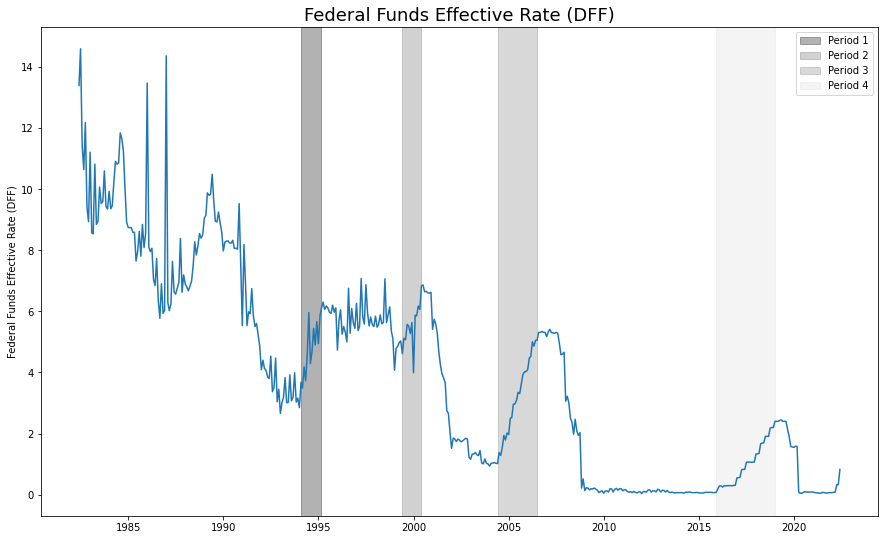

In [93]:
DFF = Get_Data('DFF')
DFF = DFF.resample('M').last()
plot(DFF, "Federal Funds Effective Rate (DFF)")
min_max_scaler = MinMaxScaler()
DFF[["DFF"]] = min_max_scaler.fit_transform(DFF[["DFF"]])

### Inflation Rate

Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)

In [62]:
CPIAUCSL = Get_Data('CPIAUCSL')
CPIAUCSL = CPIAUCSL.resample('M').last()
CPIAUCSL['InflationRate_All'] = CPIAUCSL['CPIAUCSL'].pct_change(periods=12)
min_max_scaler = MinMaxScaler()
CPIAUCSL[["InflationRate_All"]] = min_max_scaler.fit_transform(CPIAUCSL[["InflationRate_All"]])

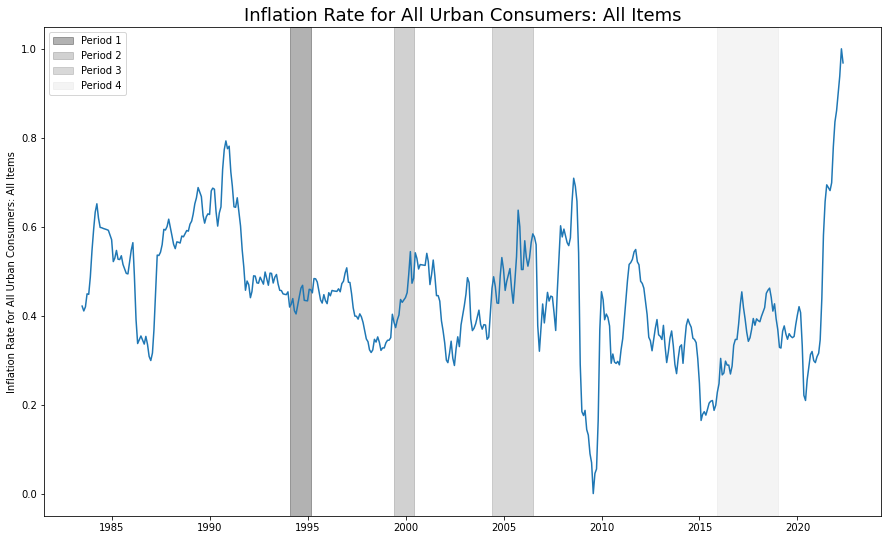

In [58]:
plot(CPIAUCSL['InflationRate_All'], "Inflation Rate for All Urban Consumers: All Items")

Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average (CPILFESL)

In [60]:
CPILFESL = Get_Data('CPILFESL')
CPILFESL = CPILFESL.resample('M').last()
CPILFESL['InflationRate_LessFoodEnergy'] = CPILFESL['CPILFESL'].pct_change(periods=12)
min_max_scaler = MinMaxScaler()
CPILFESL[["InflationRate_LessFoodEnergy"]] = min_max_scaler.fit_transform(CPILFESL[["InflationRate_LessFoodEnergy"]])

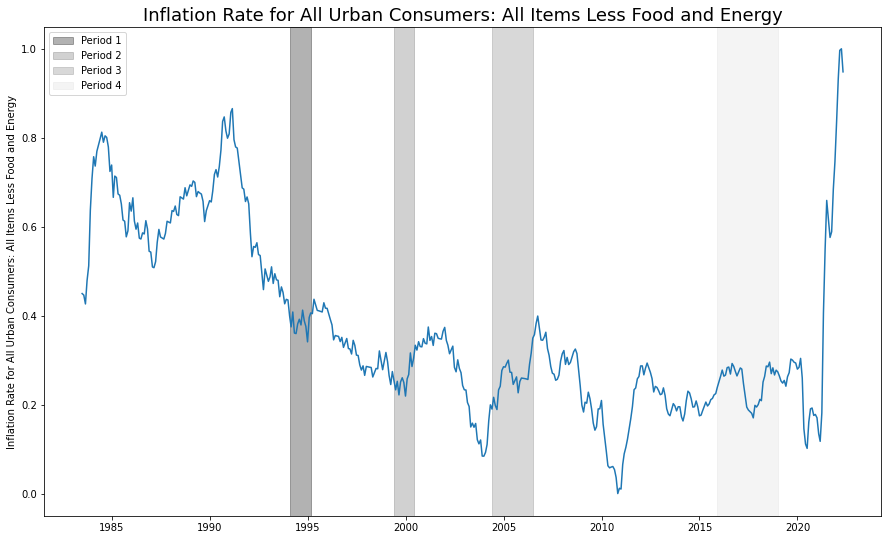

In [67]:
plot(CPILFESL['InflationRate_LessFoodEnergy'], "Inflation Rate for All Urban Consumers: All Items Less Food and Energy")

### FED open market operations

Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level (WALCL)

In [63]:
WALCL = Get_Data('WALCL')
WALCL = WALCL.resample('M').last()
WALCL['AssetPct'] = WALCL['WALCL'].pct_change()
min_max_scaler = MinMaxScaler()
WALCL[["AssetPct"]] = min_max_scaler.fit_transform(WALCL[["AssetPct"]])
WALCL

,WALCL,AssetPct
Date,,
2002-12-31,732059.0,NaN
2003-01-31,712809.0,0.148082
2003-02-28,721980.0,0.199316
2003-03-31,725019.0,0.187991
2003-04-30,746294.0,0.220873
...,...,...
2022-01-31,8860485.0,0.197874
2022-02-28,8928129.0,0.192471
2022-03-31,8937142.0,0.183804


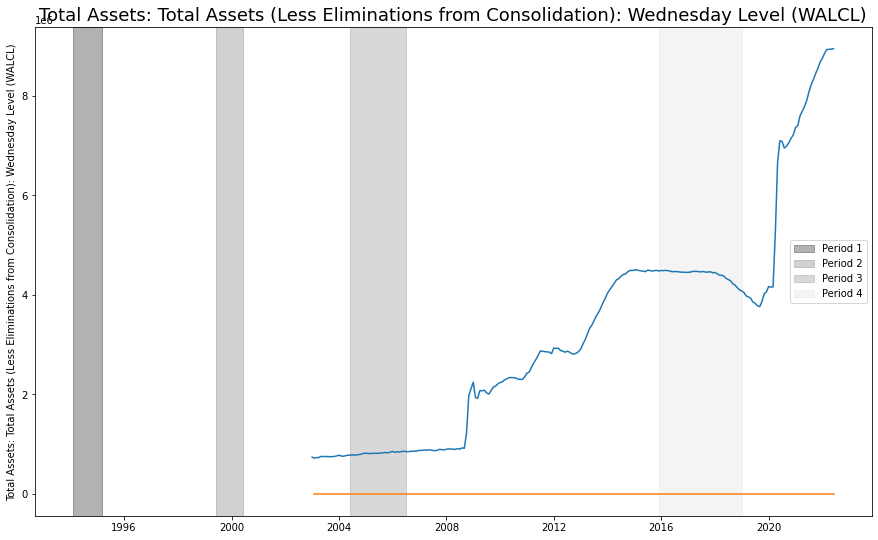

In [66]:
plot(WALCL, "Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level (WALCL)")

Currency in Circulation (CURRCIR)

In [68]:
CURRCIR = Get_Data('CURRCIR')
CURRCIR = CURRCIR.resample('M').last()
CURRCIR['CURRCIRPct'] = CURRCIR['CURRCIR'].pct_change()
min_max_scaler = MinMaxScaler()
CURRCIR[["CURRCIRPct"]] = min_max_scaler.fit_transform(CURRCIR[["CURRCIRPct"]])

,CURRCIR,CURRCIRPct
Date,,
1982-06-30,147.484,NaN
1982-07-31,148.853,0.561446
1982-08-31,149.270,0.497906
1982-09-30,149.728,0.500522
1982-10-31,150.325,0.509532
...,...,...
2021-12-31,2223.870,0.525048
2022-01-31,2233.621,0.513429
2022-02-28,2232.107,0.463795


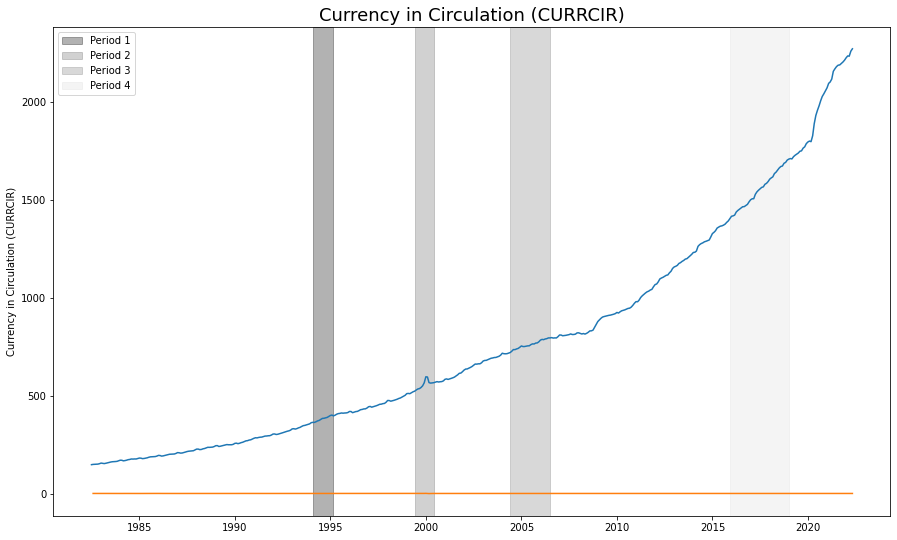

In [71]:
plot(CURRCIR, "Currency in Circulation (CURRCIR)")

Asset = Currency in Circulation + Reserve

### Economy Performance

Unemployment Rate (UNRATE)

In [73]:
UNRATE = Get_Data('UNRATE')
UNRATE = UNRATE.resample('M').last()
min_max_scaler = MinMaxScaler()
UNRATE[["UNRATE"]] = min_max_scaler.fit_transform(UNRATE[["UNRATE"]])

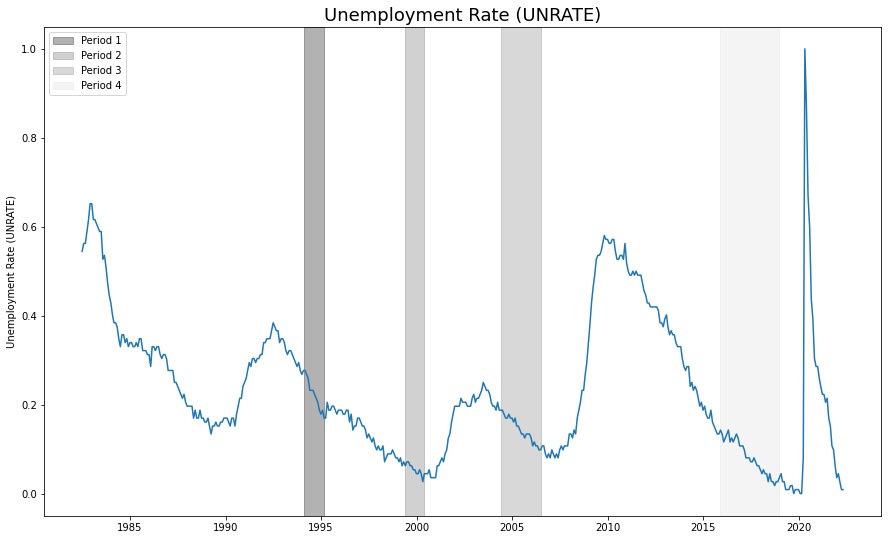

In [74]:
plot(UNRATE, "Unemployment Rate (UNRATE)")

Initial Claims (ICSA)

In [79]:
ICSA = Get_Data('ICSA')
ICSA = ICSA.resample('M').last()
min_max_scaler = MinMaxScaler()
ICSA[["ICSA"]] = min_max_scaler.fit_transform(ICSA[["ICSA"]])
ICSA

,ICSA
Date,
1982-05-31,0.072208
1982-06-30,0.071169
1982-07-31,0.075152
1982-08-31,0.082424
1982-09-30,0.086580
...,...
2022-01-31,0.007446
2022-02-28,0.001905
2022-03-31,0.000000


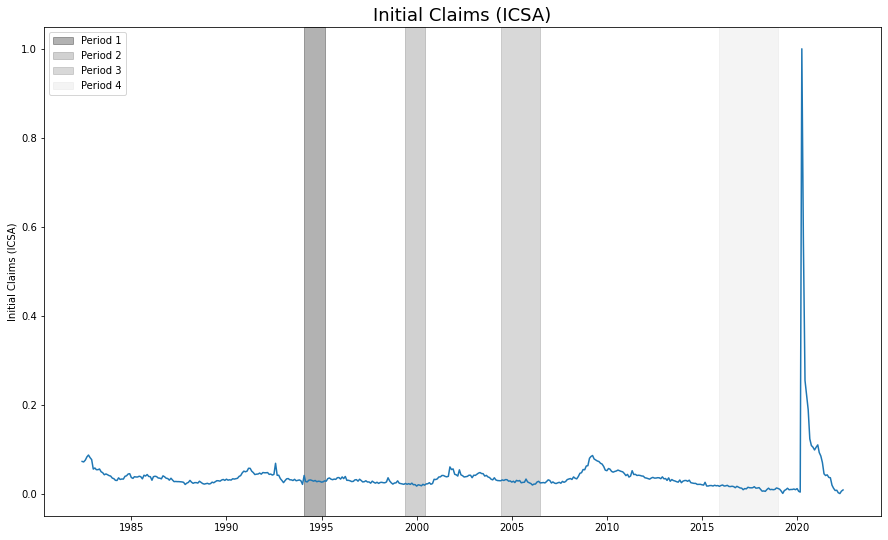

In [80]:
plot(ICSA, "Initial Claims (ICSA)")

In [170]:
import yfinance as yf
tickers = pd.read_csv('Industry.csv')
tickers = tickers['ETF'].values.tolist()

In [238]:
Assets = yf.download(tickers, period="max")['Adj Close']
Assets = Assets[np.logical_and.reduce([Assets.index > '2003-06-28'])]
Assets = Assets.dropna(axis=1)

[*********************100%***********************]  16 of 16 completed


In [237]:
min_max_scaler = MinMaxScaler()
Assets[Assets.columns] = min_max_scaler.fit_transform(Assets[Assets.columns])
Assets.columns

Index(['IBB', 'IGV', 'IYM', 'OIH', 'SOXX', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
       'XLP', 'XLU', 'XLV', 'XLY'],
      dtype='object')

In [234]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
fig.add_shape(type="rect",
    x0="2004-05-31", x1="2005-05-31", y0=0, y1=1,
    line=dict(
        color="Dimgrey",
        width=2,
    ),
    fillcolor="Dimgrey",
    layer='below'
)
fig.add_shape(type="rect",
    x0="2004-05-31", x1="2006-06-31", y0=0, y1=1,
    line=dict(
        color="Dimgrey",
        width=2,
    ),
    fillcolor="Dimgrey",
    layer='below'
)
fig.add_shape(type="rect",
    x0="2015-11-30", x1="2018-12-31", y0=0, y1=1,
    line=dict(
        color="Dimgrey",
        width=2,
    ),
    fillcolor="Dimgrey",
    layer='below'
)
for ticker in Assets.columns:
  fig.add_trace(go.Scatter(x=Assets.index, y=Assets[ticker],mode='lines',name=ticker))
fig.show()

In [264]:
# # Import Pyfolio
# import pyfolio as pf
# total_returns = yf.download('IBB', period="max")['Adj Close']
# total_returns
pf.create_returns_tear_sheet(Assets['IBB'].pct_change().dropna())

Start date,2003-07-01
End date,2022-05-24
Total months,226
,Backtest
Annual return,9.2%
Cumulative returns,429.1%
Annual volatility,24.0%
Sharpe ratio,0.49
Calmar ratio,0.23
Stability,0.90
Max drawdown,-39.5%


AttributeError: ignored

In [169]:
Assets

,IBB,IGV,IYM,IYT,OIH,SOXX,VGT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,
2004-04-01,0.039390,0.025252,0.076840,0.040526,0.233053,0.062445,0.032655,0.053482,0.000940,0.339943,0.073016,0.030561,0.012979,0.016910,0.039120,0.059843
2004-04-02,0.042896,0.027381,0.081026,0.043629,0.235406,0.065782,0.034802,0.057325,0.002161,0.338293,0.075238,0.032947,0.013262,0.015934,0.041241,0.061007
2004-04-05,0.045207,0.028228,0.080365,0.042228,0.234337,0.066577,0.035387,0.056539,0.003571,0.339493,0.077609,0.033790,0.014019,0.016503,0.043302,0.062331
2004-04-06,0.043103,0.027450,0.081797,0.044630,0.232069,0.064352,0.034900,0.057674,0.003571,0.339193,0.077461,0.032760,0.015059,0.016585,0.042713,0.062050
2004-04-07,0.042793,0.026671,0.078272,0.043128,0.234337,0.064225,0.033807,0.054967,0.003571,0.337992,0.077016,0.032152,0.014492,0.014552,0.041889,0.061087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-18,0.602386,0.572563,0.853344,0.779076,0.179419,0.710233,0.714044,0.889441,0.961816,0.784014,0.840382,0.733669,0.869559,0.919103,0.881319,0.655523
2022-05-19,0.611766,0.583532,0.862453,0.762388,0.179124,0.705705,0.708654,0.896976,0.957288,0.778117,0.831746,0.724913,0.850456,0.916800,0.883551,0.656030
2022-05-20,0.615467,0.591384,0.856077,0.763607,0.179437,0.705312,0.709905,0.894378,0.962570,0.776509,0.821424,0.726664,0.852694,0.919870,0.895985,0.643413


## Data Processing

In [94]:
Data = pd.concat([CPIAUCSL, CPILFESL, WALCL, CURRCIR, UNRATE, ICSA], axis=1)
Data

,CPIAUCSL,InflationRate_All,CPILFESL,InflationRate_LessFoodEnergy,WALCL,AssetPct,CURRCIR,CURRCIRPct,UNRATE,ICSA
Date,,,,,,,,,,
1982-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072208
1982-06-30,97.000,NaN,96.100,NaN,NaN,NaN,147.484,NaN,0.544643,0.071169
1982-07-31,97.500,NaN,96.700,NaN,NaN,NaN,148.853,0.561446,0.562500,0.075152
1982-08-31,97.700,NaN,97.100,NaN,NaN,NaN,149.270,0.497906,0.562500,0.082424
1982-09-30,97.700,NaN,97.200,NaN,NaN,NaN,149.728,0.500522,0.589286,0.086580
...,...,...,...,...,...,...,...,...,...,...
2022-01-31,281.933,0.901900,286.431,0.932242,8860485.0,0.197874,2233.621,0.513429,0.044643,0.007446
2022-02-28,284.182,0.938613,287.878,0.996521,8928129.0,0.192471,2232.107,0.463795,0.026786,0.001905
2022-03-31,287.708,1.000000,288.811,1.000000,8937142.0,0.183804,2257.649,0.582629,0.008929,0.000000


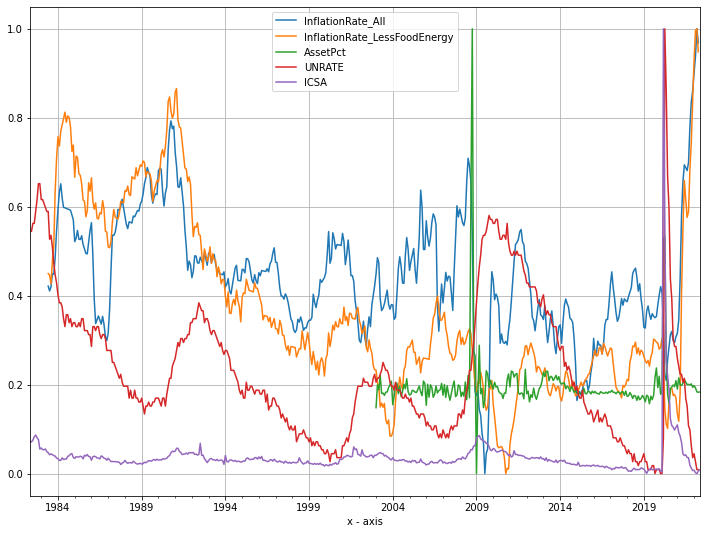

In [95]:
Data[['InflationRate_All', 'InflationRate_LessFoodEnergy', 'AssetPct', 'UNRATE', 'ICSA']].plot(figsize=(12,9))#,colormap='Paired' )
plt.xlabel('x - axis')
plt.legend(loc='best')
plt.grid()
plt.show()

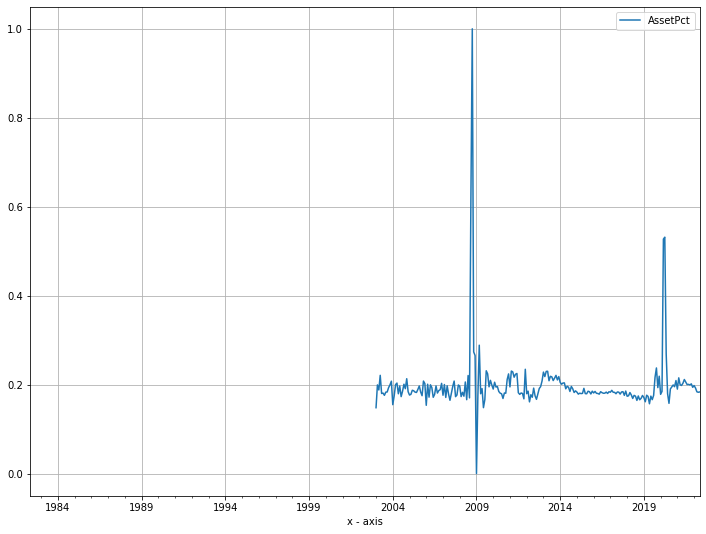

In [96]:
Data[['AssetPct']].plot(figsize=(12,9))#,colormap='Paired' )
plt.xlabel('x - axis')
plt.legend(loc='best')
plt.grid()
plt.show()

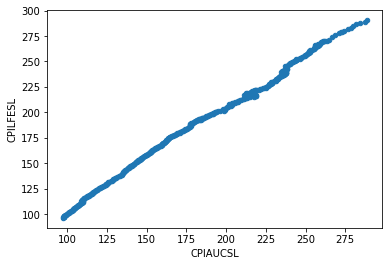

In [97]:
import matplotlib.pyplot as plt
Data.plot(x ='CPIAUCSL', y='CPILFESL', kind = 'scatter')
plt.show()

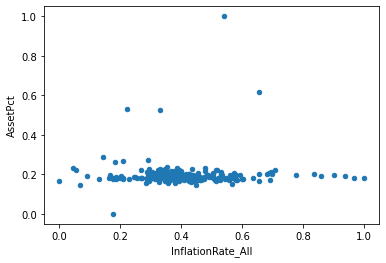

In [98]:
Data.plot(x ='InflationRate_All', y='AssetPct', kind = 'scatter')
plt.show()

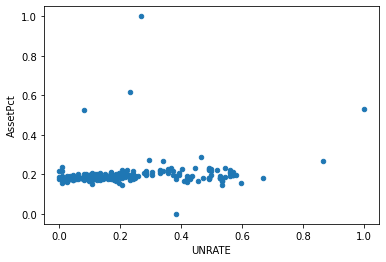

In [99]:
Data.plot(x ='UNRATE', y='AssetPct', kind = 'scatter')
plt.show()

In [101]:
corr = Data[['InflationRate_All', 'InflationRate_LessFoodEnergy', 'AssetPct', 'CURRCIRPct', 'UNRATE', 'ICSA']].corr()
corr.style.background_gradient(cmap='coolwarm')

,InflationRate_All,InflationRate_LessFoodEnergy,AssetPct,CURRCIRPct,UNRATE,ICSA
InflationRate_All,1.000000,0.722070,0.051438,-0.042480,-0.207659,-0.137406
InflationRate_LessFoodEnergy,0.722070,1.000000,-0.003545,0.013432,-0.049970,-0.086576
AssetPct,0.051438,-0.003545,1.000000,0.360764,0.156963,0.423160
CURRCIRPct,-0.042480,0.013432,0.360764,1.000000,0.146881,0.196658
UNRATE,-0.207659,-0.049970,0.156963,0.146881,1.000000,0.320969
ICSA,-0.137406,-0.086576,0.423160,0.196658,0.320969,1.000000


## Shrink the balance sheet
1. Tappering: Reducing the monthly pace of net purchases of Treasury securities and agency MBS
2. Raise Interest Rate > will reduce the Valuation of Growth Stock (Tech companies)
3. Balance Sheet Runoff. 